<a href="https://colab.research.google.com/github/germfsip/2231Procesamiento-digital-de-imagenes/blob/main/PDI_Clase_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Operaciones con histograma

##Dr. Gerardo Martinez

Bibliotecas

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Cargar la imagen

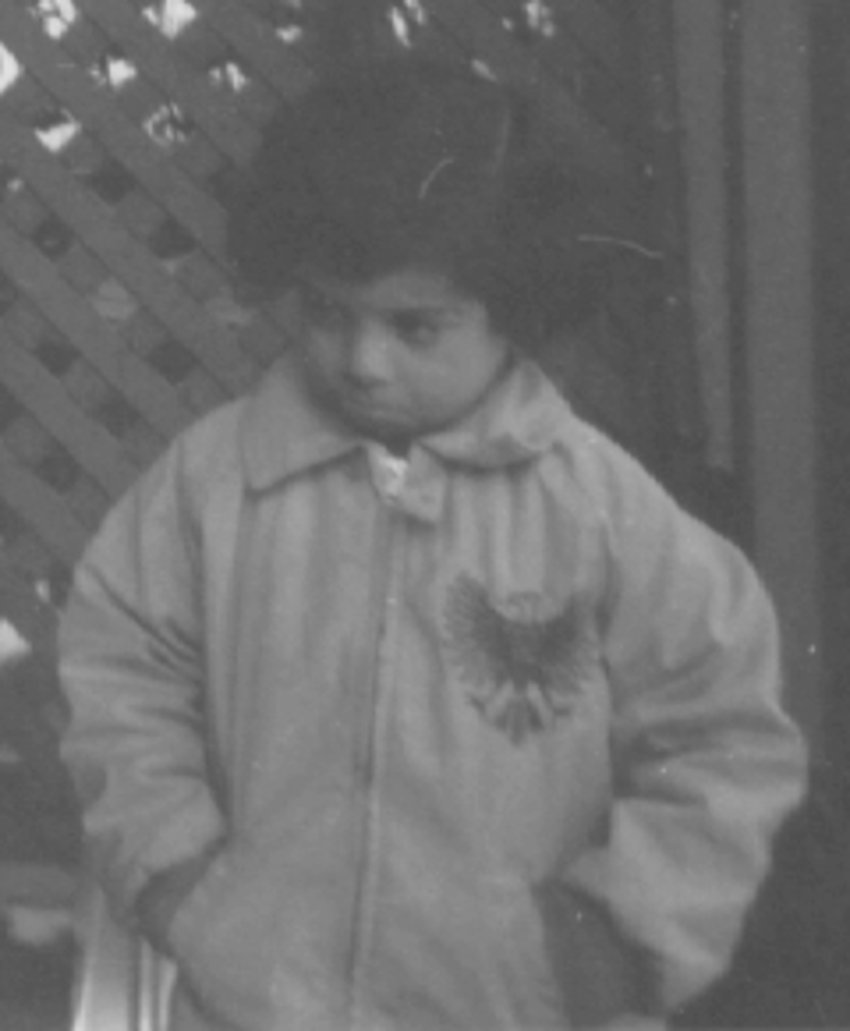

Tamaño =  (1031, 850, 3)
Alto =  1031
Ancho =  850
Valor max  =  225
Valor min  =  74


In [ ]:
img= cv2.imread("niña.jpg")
cv2_imshow(img)


def medidas(imagen):
  print('Tamaño = ',imagen.shape)
  print('Alto = ',imagen.shape [0])
  print('Ancho = ',imagen.shape [1])
  print('Valor max  = ',np.max(imagen))
  print('Valor min  = ',np.min(imagen))

medidas(img)
alto = img.shape [0]
ancho = img.shape [1]

Calculando el histograma

In [ ]:
rango = [0,256]
valores = 256
val, ran = np.histogram(img, valores, rango)
conteo = ran[:-1] 

val

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,     87,    711,   2631,  12024,  28056,  27741,
        35226,  49671, 103065, 105165,  65109,  43878,  48360,  56349,
        38337,  35214,  30261,  31323,  32505,  47745,  49656,  41952,
        39849,  52476,  75795,  56493,  39384,  39198,  40275,  36540,
        32574,  37197,  42648,  37080,  27387,  21150,  17007,  14769,
      

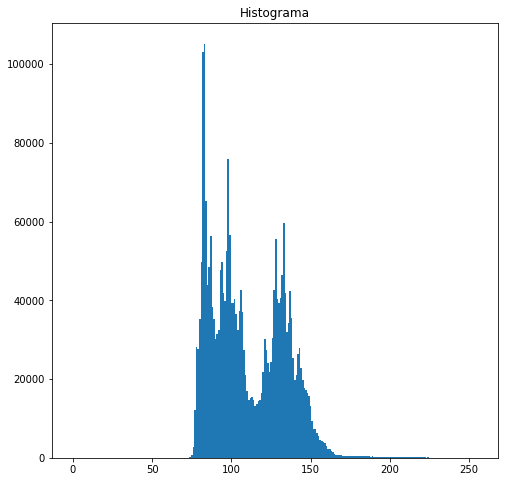

In [ ]:
def histograma(ejeX, imagen):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.bar(ejeX, imagen, width=imagen.shape[0] / (ejeX[-1] - ejeX[0] + 1))
    return fig, ax

histograma(conteo, val)
plt.title("Histograma")
plt.show()

Normalizar el histograma con distribución de probabilidad

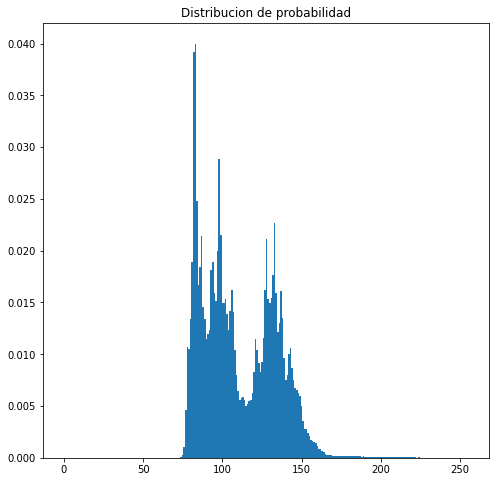

In [ ]:
prob = val / np.sum(val)

histograma(conteo, prob)
plt.title("Distribucion de probabilidad")
plt.show()

Aplicando la funcion de distribución acumulativa

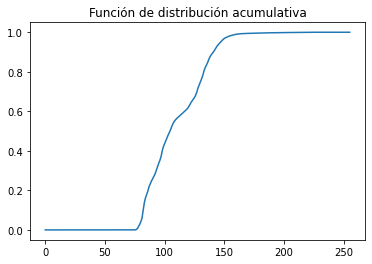

In [ ]:
cdf = np.cumsum(prob)

plt.plot(cdf)
plt.title("Función de distribución acumulativa")
plt.show()

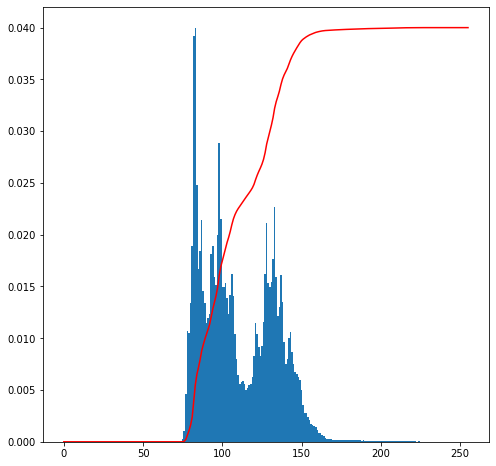

In [ ]:
fig, ax = histograma(conteo, prob)
ax.plot(cdf * np.max(prob), "r")
plt.show()

Se realiza la normalización usando la función de distribución acumulativa

In [ ]:
f_equ = np.round(cdf*255).astype(int)
f_equ

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         4,   7,  10,  15,  25,  35,  42,  46,  51,  56,  60,  63,  66,
        69,  72,  77,  82,  86,  90,  95, 102, 108, 111, 115, 119, 123,
       126, 129, 134, 137, 140, 142, 144, 145, 146, 148, 149, 151, 152,
       153, 155, 156, 159, 161, 164, 166, 169, 171, 174, 178, 183, 187,
       191, 195, 200, 205, 209, 213, 216, 220, 223, 226, 228, 230, 232,
       235, 237, 239, 241, 243, 244, 246, 247, 248, 249, 249, 250, 250,
       251, 251, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 25

Usando la funcion ecualizada obtenemos la imagen ecualizada

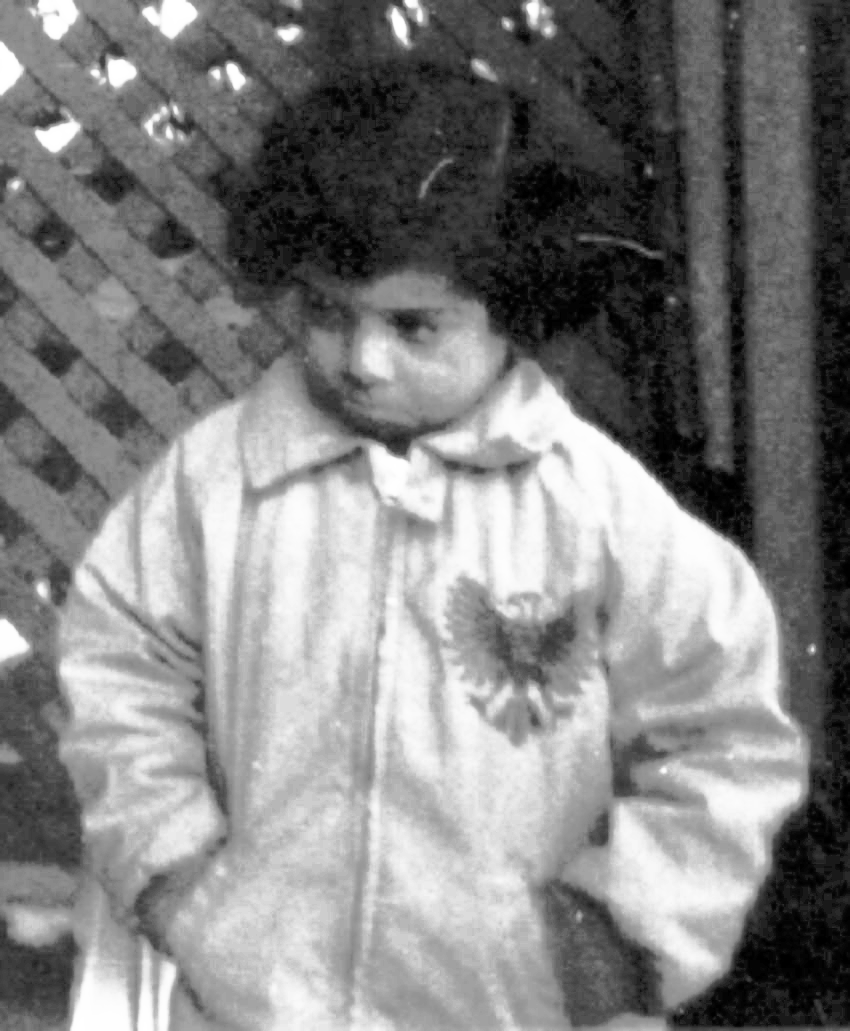

In [ ]:
imagen_ecua = f_equ[img]

cv2_imshow(imagen_ecua)


Revisando el histograma

In [ ]:
val_ecu, ran_ecu = np.histogram(imagen_ecua, valores, rango)
conteo = ran_ecu[:-1] 

val_ecu

array([  3429,  12024,      0,      0,  28056,      0,      0,  27741,
            0,      0,  35226,      0,      0,      0,      0,  49671,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 103065,      0,      0,      0,      0,      0,      0,
            0,      0,      0, 105165,      0,      0,      0,      0,
            0,      0,  65109,      0,      0,      0,  43878,      0,
            0,      0,      0,  48360,      0,      0,      0,      0,
        56349,      0,      0,      0,  38337,      0,      0,  35214,
            0,      0,  30261,      0,      0,  31323,      0,      0,
        32505,      0,      0,      0,      0,  47745,      0,      0,
            0,      0,  49656,      0,      0,      0,  41952,      0,
            0,      0,  39849,      0,      0,      0,      0,  52476,
            0,      0,      0,      0,      0,      0,  75795,      0,
            0,      0,      0,      0,  56493,      0,      0,  39384,
      

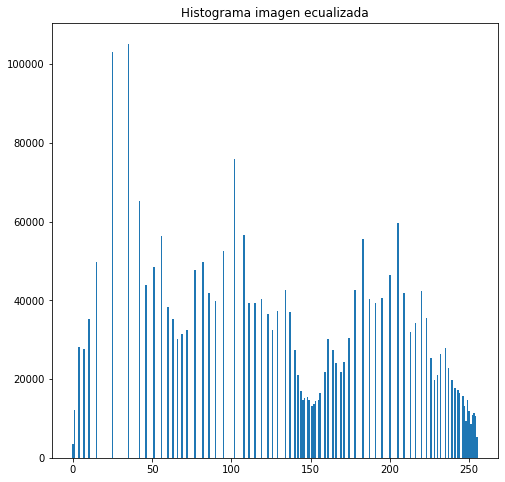

In [ ]:
histograma(conteo, val_ecu)
plt.title("Histograma imagen ecualizada")
plt.show()

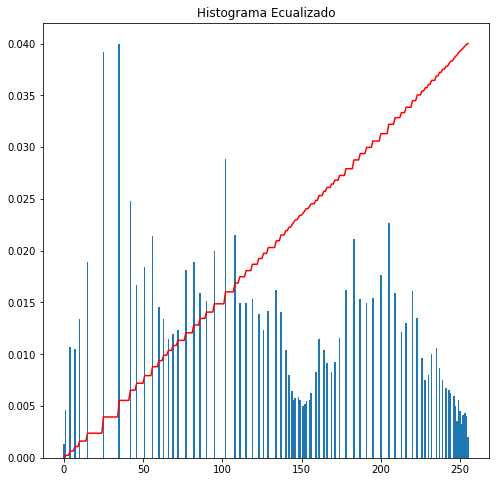

In [ ]:
prob_ecu = val_ecu / np.sum(val_ecu)
cdf_ecu = np.cumsum(prob_ecu)

fig, ax = histograma(conteo, prob_ecu)
ax.plot(cdf_ecu * np.max(prob_ecu), "r")
plt.title("Histograma Ecualizado")
plt.show()

Comparativa

In [ ]:
cv2_imshow(img)
cv2_imshow(imagen_ecua)

In [ ]:
val_med = np.round(val_ecu * (val_ecu/np.sum(val_ecu))).astype(int)
val_med

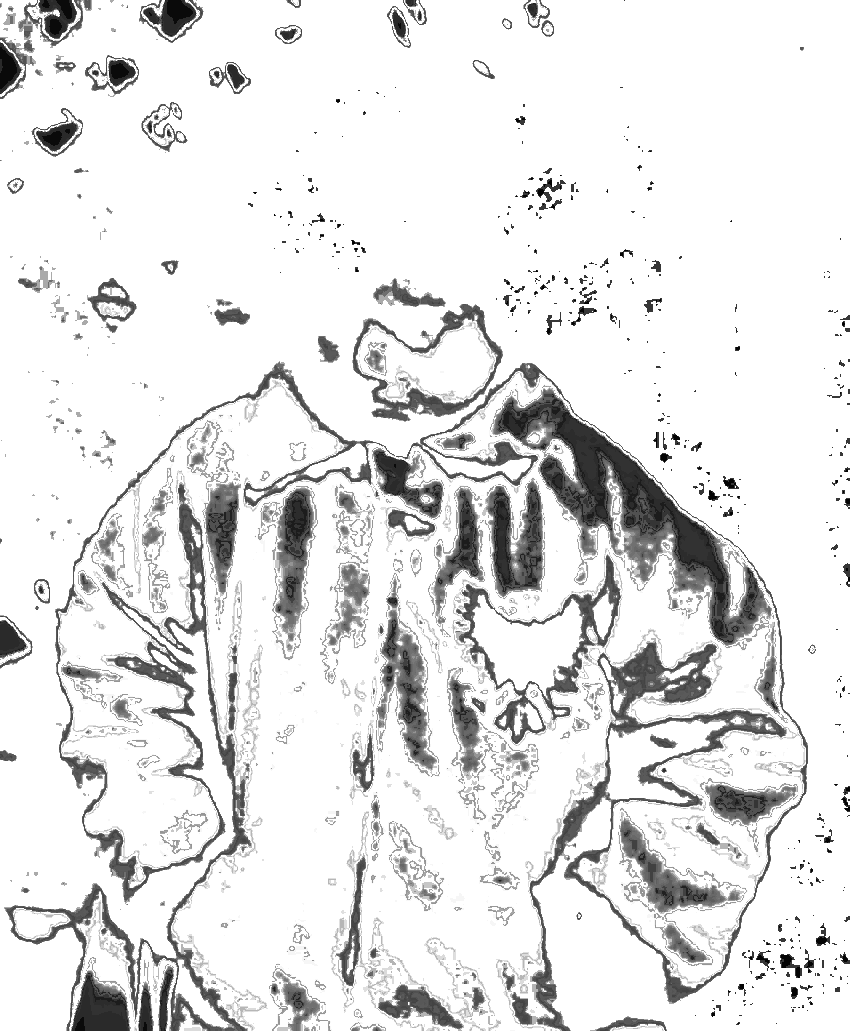

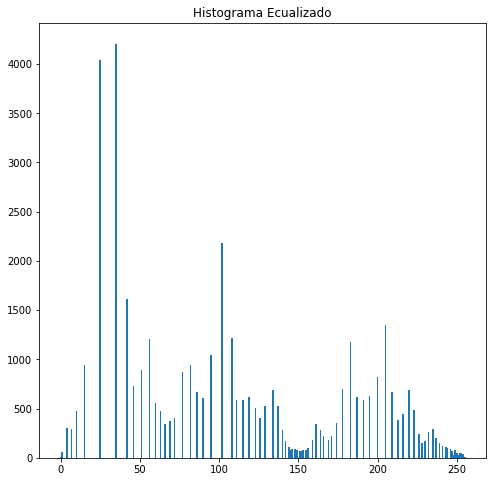

In [ ]:
imagen_med= val_med[imagen_ecua]

cv2_imshow(imagen_med)


fig, ax = histograma(conteo, val_med)
plt.title("Histograma Ecualizado")
plt.show()